In [107]:
import pandas as pd
import numpy as np

Total Nebula images: 258


(np.float64(-0.5), np.float64(1279.5), np.float64(639.5), np.float64(-0.5))

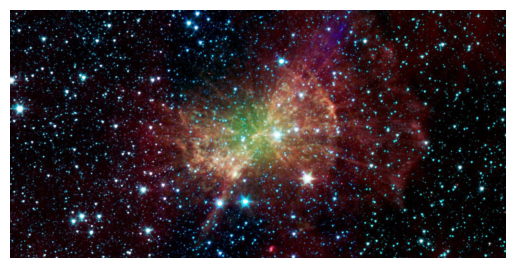

In [108]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder path
image_path = r"D:\vamsi krishna\space_dataset\total\Nebula"

# Create LIST of image files
image_files = [
    os.path.join(image_path, f)
    for f in os.listdir(image_path)
    if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".tif", ".webp", ".jfif"))
]

print("Total Nebula images:", len(image_files))

# Read & show one image safely
image = cv2.imread(image_files[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")

In [109]:
len(os.listdir(image_path))


258

In [110]:
import cv2
import numpy as np

image_num_data = []

processed = 0
skipped = 0

for path in image_files:   # image_files = list of image paths
    image = cv2.imread(path)

    # Skip unreadable images
    if image is None:
        skipped += 1
        continue

    # ✅ BGR → GRAYSCALE (MUST MATCH app.py)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize exactly like app.py
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)

    # ✅ Normalize (THIS WAS MISSING)
    image = image.astype("float32") / 255.0

    # Flatten → 4096 features
    image_flat = image.flatten()

    image_num_data.append(image_flat)
    processed += 1

# Convert to NumPy array
X = np.array(image_num_data)

print("Total image files:", len(image_files))
print("Processed images:", processed)
print("Skipped images:", skipped)
print("Final feature matrix shape:", X.shape)




Total image files: 258
Processed images: 258
Skipped images: 0
Final feature matrix shape: (258, 4096)


In [111]:
print("Original images:", len(image_files))
print("Processed images:", len(image_num_data))
print("Skipped images:", len(image_files) - len(image_num_data))

Original images: 258
Processed images: 258
Skipped images: 0


In [112]:
#converting list into numpy array
image_array=np.array(image_num_data)

In [113]:
#verifying the properties of numpy array
print(type(image_array))
print(image_array.shape)
print(image_array.ndim)

<class 'numpy.ndarray'>
(258, 4096)
2


In [114]:
#converting numpy array into data frame
df1=pd.DataFrame(image_array)

In [115]:
df1["target"]="Nebula"

In [116]:
df1

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.023529,0.047059,0.019608,0.023529,0.015686,0.058824,0.027451,0.050980,0.066667,0.031373,...,0.482353,0.066667,0.015686,0.019608,0.027451,0.019608,0.486275,0.027451,0.023529,Nebula
1,0.007843,0.007843,0.027451,0.019608,0.011765,0.219608,0.015686,0.015686,0.015686,0.039216,...,0.019608,0.031373,0.007843,0.007843,0.007843,0.027451,0.011765,0.019608,0.027451,Nebula
2,0.239216,0.462745,0.458824,0.458824,0.458824,0.462745,0.462745,0.462745,0.462745,0.462745,...,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.007843,0.352941,Nebula
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Nebula
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.019608,0.027451,0.003922,0.070588,0.015686,0.027451,0.047059,0.011765,Nebula
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.164706,0.168627,0.176471,0.211765,0.149020,0.176471,0.211765,0.168627,0.192157,0.200000,...,0.196078,0.192157,0.243137,0.235294,0.274510,0.262745,0.223529,0.239216,0.282353,Nebula
254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,Nebula
255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Nebula
256,0.070588,0.070588,0.121569,0.066667,0.082353,0.074510,0.098039,0.082353,0.086275,0.086275,...,0.078431,0.082353,0.082353,0.058824,0.054902,0.066667,0.047059,0.054902,0.039216,Nebula


Total Nebula images: 448


(np.float64(-0.5), np.float64(1279.5), np.float64(1279.5), np.float64(-0.5))

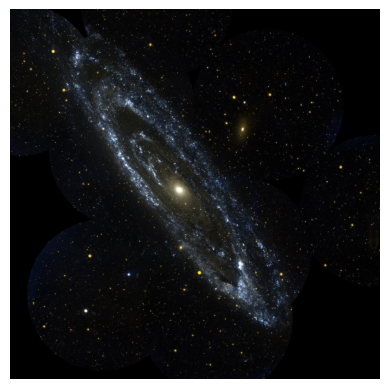

In [117]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder path
image_path = r"D:\vamsi krishna\space_dataset\total\galaxy"

# Create LIST of image files
image_files = [
    os.path.join(image_path, f)
    for f in os.listdir(image_path)
    if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".tif", ".webp", ".jfif"))
]

print("Total Nebula images:", len(image_files))

# Read & show one image safely
image = cv2.imread(image_files[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")

In [118]:
len(os.listdir(image_path))

448

In [119]:
import cv2
import numpy as np

image_num_data = []

processed = 0
skipped = 0

for path in image_files:   # image_files = list of image paths
    image = cv2.imread(path)

    # Skip unreadable images
    if image is None:
        skipped += 1
        continue

    # ✅ BGR → GRAYSCALE (MUST MATCH app.py)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize exactly like app.py
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)

    # ✅ Normalize (THIS WAS MISSING)
    image = image.astype("float32") / 255.0

    # Flatten → 4096 features
    image_flat = image.flatten()

    image_num_data.append(image_flat)
    processed += 1

# Convert to NumPy array
X = np.array(image_num_data)

print("Total image files:", len(image_files))
print("Processed images:", processed)
print("Skipped images:", skipped)
print("Final feature matrix shape:", X.shape)




Total image files: 448
Processed images: 448
Skipped images: 0
Final feature matrix shape: (448, 4096)


In [120]:
print("Original images:", len(image_files))
print("Processed images:", len(image_num_data))
print("Skipped images:", len(image_files) - len(image_num_data))

Original images: 448
Processed images: 448
Skipped images: 0


In [121]:
#converting list into numpy array
image_array=np.array(image_num_data)

In [122]:
#verifying the properties of numpy array
print(type(image_array))
print(image_array.shape)
print(image_array.ndim)

<class 'numpy.ndarray'>
(448, 4096)
2


In [123]:
#converting numpy array into data frame
df2=pd.DataFrame(image_array)

In [124]:
df2["target"]="Galaxy"

In [125]:
df2

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.039216,0.043137,0.054902,0.054902,0.043137,0.082353,0.090196,0.058824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Galaxy
1,0.011765,0.050980,0.003922,0.000000,0.003922,0.000000,0.000000,0.015686,0.011765,0.007843,...,0.007843,0.000000,0.003922,0.000000,0.003922,0.003922,0.003922,0.007843,0.003922,Galaxy
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.050980,0.031373,0.007843,0.003922,...,0.007843,0.007843,0.015686,0.023529,0.039216,0.007843,0.000000,0.000000,0.000000,Galaxy
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Galaxy
4,0.003922,0.011765,0.015686,0.000000,0.000000,0.035294,0.000000,0.000000,0.003922,0.000000,...,0.000000,0.007843,0.007843,0.000000,0.000000,0.015686,0.000000,0.000000,0.000000,Galaxy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.121569,0.152941,0.172549,0.098039,0.078431,0.058824,0.086275,0.125490,0.105882,0.160784,...,0.113725,0.074510,0.109804,0.094118,0.145098,0.094118,0.458824,0.035294,0.109804,Galaxy
444,0.027451,0.031373,0.031373,0.035294,0.035294,0.035294,0.039216,0.039216,0.031373,0.027451,...,0.023529,0.023529,0.019608,0.019608,0.019608,0.019608,0.023529,0.027451,0.027451,Galaxy
445,0.078431,0.058824,0.066667,0.133333,0.286275,0.054902,0.447059,0.180392,0.478431,0.027451,...,0.050980,0.235294,0.211765,0.403922,0.360784,0.094118,0.078431,0.047059,0.054902,Galaxy
446,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,Galaxy


In [126]:
import pandas as pd

# Step 1: Merge all three image DataFrames row-wise
final_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Step 2: Shuffle the merged dataset
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Verify final output
print("Final dataset shape:", final_df.shape)
print("\nClass distribution:")
print(final_df["target"].value_counts())

Final dataset shape: (706, 4097)

Class distribution:
target
Galaxy    448
Nebula    258
Name: count, dtype: int64


In [127]:
final_df.isnull().sum().sum()

np.int64(0)

In [128]:
final_df.isnull().sum()


0         0
1         0
2         0
3         0
4         0
         ..
4092      0
4093      0
4094      0
4095      0
target    0
Length: 4097, dtype: int64

In [129]:
# Check duplicate rows
final_df.duplicated().sum()

np.int64(53)

In [130]:
final_df = final_df.drop_duplicates().reset_index(drop=True)

In [131]:
print(final_df.shape)
print(final_df["target"].value_counts())

(653, 4097)
target
Galaxy    443
Nebula    210
Name: count, dtype: int64


In [132]:
X = final_df.drop("target", axis=1)
y = final_df["target"]

In [133]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Label mapping:
{'Galaxy': np.int64(0), 'Nebula': np.int64(1)}


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [135]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [136]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (522, 4096)
X_test : (131, 4096)
y_train: (522,)
y_test : (131,)


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

tuned_parameters_dt = [{
    "max_depth": [3, 4],
    "min_samples_split": [40, 50, 60],
    "min_samples_leaf": [20, 30, 40]
}]

clf_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=tuned_parameters_dt,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

clf_dt.fit(X_train, y_train)

best_dt = clf_dt.best_estimator_
print("Best Parameters:", clf_dt.best_params_)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 40}


In [138]:
from sklearn.metrics import accuracy_score, classification_report

# Best Decision Tree model
best_dt = clf_dt.best_estimator_

# Predictions on TEST data (already PCA-transformed in Step 1)
y_pred_dt = best_dt.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6793893129770993

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        89
           1       0.50      0.52      0.51        42

    accuracy                           0.68       131
   macro avg       0.64      0.64      0.64       131
weighted avg       0.68      0.68      0.68       131



In [139]:
y_pred_train = best_dt.predict(X_train)

# Accuracy
dt_accuracy_train = accuracy_score(y_train, y_pred_train)
print("Decision Tree Accuracy:", dt_accuracy_train)

# Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_train, y_pred_train))

Decision Tree Accuracy: 0.7298850574712644

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       354
           1       0.58      0.60      0.59       168

    accuracy                           0.73       522
   macro avg       0.69      0.70      0.69       522
weighted avg       0.73      0.73      0.73       522



In [140]:
from collections import Counter
print("Prediction distribution:", Counter(y_pred_dt))


Prediction distribution: Counter({np.int64(0): 87, np.int64(1): 44})


In [141]:
import pickle

with open("dt_Space_data_project_best_2.pkl", "wb") as f:
    pickle.dump(best_dt, f)

In [142]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [143]:
from collections import Counter

print("Train labels:", Counter(y_train))
print("Test labels :", Counter(y_test))
print("Predicted   :", Counter(best_dt.predict(X_test)))


Train labels: Counter({np.int64(0): 354, np.int64(1): 168})
Test labels : Counter({np.int64(0): 89, np.int64(1): 42})
Predicted   : Counter({np.int64(0): 87, np.int64(1): 44})
